In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install keras.utils 

  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=b1d1c5740f75e8f93bf856e964e4b4d6fe284b8ba15074128a3ee2ebcd2ddc47
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils


In [ ]:
import tensorflow as tf
import pandas as pd 
from tensorflow.keras.utils import to_categorical
import random
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential
from glob import glob

In [ ]:
# Define Constants by re-sizing all the images
IMAGE_SIZE = [224, 224]

train_path = '../content/drive/MyDrive/Face Recognition/Train_Image'
valid_path = '../content/drive/MyDrive/Face Recognition/Test_Image'

In [ ]:
!ls '../content/drive/MyDrive/Face/Test_Image'

ls: cannot access '../content/drive/MyDrive/Face/Test_Image': No such file or directory


In [ ]:
# Import the InceptionV3 model and here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
# We don't need to train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# Folders in the Training Set
folders = glob('../content/drive/MyDrive/Face Recognition/Train_Image/*')
folders

['../content/drive/MyDrive/Face Recognition/Train_Image/Elias',
 '../content/drive/MyDrive/Face Recognition/Train_Image/Wahid',
 '../content/drive/MyDrive/Face Recognition/Train_Image/Mugdho']

In [ ]:
# Model layers -> can add more if required
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# Create a model object
model = Model(inputs=inception.input, outputs=prediction)

# View the structure of the model

In [ ]:
# Defining the cost and model optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Training Generator
training_set = train_datagen.flow_from_directory('../content/drive/MyDrive/Face Recognition/Train_Image',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 849 images belonging to 3 classes.


In [ ]:
# Testing Generator
test_set = test_datagen.flow_from_directory('../content/drive/MyDrive/Face Recognition/Test_Image',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 213 images belonging to 3 classes.


In [ ]:
# fit the model, it will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
27/27 [==============================] - 1043s 38s/step - loss: 3.1645 - accuracy: 0.8846 - val_loss: 1.1758 - val_accuracy: 0.9765
Epoch 2/10
27/27 [==============================] - 351s 13s/step - loss: 2.3611e-05 - accuracy: 1.0000 - val_loss: 0.8026 - val_accuracy: 0.9718
Epoch 3/10
27/27 [==============================] - 339s 13s/step - loss: 0.0232 - accuracy: 0.9976 - val_loss: 0.7373 - val_accuracy: 0.9671
Epoch 4/10
27/27 [==============================] - 325s 12s/step - loss: 0.0266 - accuracy: 0.9976 - val_loss: 1.1672 - val_accuracy: 0.9765
Epoch 5/10
27/27 [==============================] - 321s 12s/step - loss: 0.0147 - accuracy: 0.9988 - val_loss: 0.8958 - val_accuracy: 0.9765
Epoch 6/10
27/27 [==============================] - 324s 12s/step - loss: 6.1990e-07 - accuracy: 1.0000 - val_loss: 0.8044 - val_accuracy: 0.9765
Epoch 7/10
27/27 [==============================] - 327s 12s/step - loss: 4.2123e-10 - accuracy: 1.0000 - val_loss: 0.7985 - val_accuracy: 

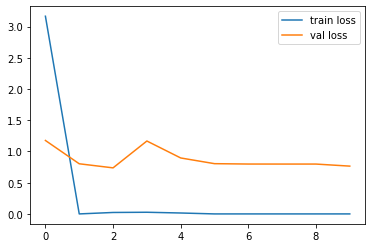

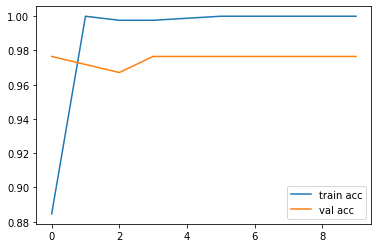

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the Loss and Accuracy
# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# Saving the model as a h5 file

from tensorflow.keras.models import load_model
model.save('model_inception.h5')

In [ ]:
y_pred = model.predict(test_set)
y_pred

array([[9.19133021e-32, 0.00000000e+00, 1.00000000e+00],
       [1.51303599e-33, 1.00000000e+00, 1.59972561e-25],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.45627569e-29, 1.46174664e-28],
       [1.27499541e-23, 9.60525893e-36, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 2.23645079e-29],
       [0.00000000e+00, 1.00000000e+00, 1.54041467e-32],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.56198381e-16, 9.11568480e-20],
       [2.31551559e-33, 1.00000000e+00, 2.89199194e-25],
       [2.28831507e-38, 1.00000000e+00, 8.91979200e-26],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.65939013e-31, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.40091